In [5]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [7]:
df = pd.read_csv(
    r"C:\Users\bhanu\OneDrive\Desktop\Machine Learning\IMDB dataset.csv",
    encoding='latin1'   
)

df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [8]:
print(df.columns)

Index(['review', 'sentiment'], dtype='object')


In [9]:
# Define which columns contain text and labels
TEXT_COL = "review"      # change if your column name is different
LABEL_COL = "sentiment"  # change if your column name is different

# Convert text to strings (in case of missing or non-string data)
texts = df[TEXT_COL].astype(str).tolist()

# Convert sentiment labels ("positive"/"negative") into numbers (1 and 0)
labels = df[LABEL_COL].astype(str).str.lower().map({"positive": 1, "negative": 0}).tolist()

# Check a few examples
for i in range(3):
    print(f"Example {i+1}:")
    print(f"Text: {texts[i][:120]}...")  # print only first 120 chars
    print(f"Label: {labels[i]}")
    print("-" * 60)

Example 1:
Text: One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this...
Label: 1
------------------------------------------------------------
Example 2:
Text: A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives...
Label: 1
------------------------------------------------------------
Example 3:
Text: I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and...
Label: 1
------------------------------------------------------------


In [12]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Split into train, validation, and test sets
texts_train, texts_temp, y_train, y_temp = train_test_split(
    texts, labels, test_size=0.3, random_state=42
)

texts_val, texts_test, y_val, y_test = train_test_split(
    texts_temp, y_temp, test_size=0.5, random_state=42
)

print(f"Training samples: {len(texts_train)}")
print(f"Validation samples: {len(texts_val)}")
print(f"Test samples: {len(texts_test)}")

# Tokenize (convert words into integers)
num_words = 10000  # use only the top 10,000 words
maxlen = 200       # max number of words per review

tokenizer = Tokenizer(num_words=num_words, oov_token="<UNK>")
tokenizer.fit_on_texts(texts_train)

# Convert text to sequences and pad them
x_train = pad_sequences(tokenizer.texts_to_sequences(texts_train), maxlen=maxlen)
x_val   = pad_sequences(tokenizer.texts_to_sequences(texts_val), maxlen=maxlen)
x_test  = pad_sequences(tokenizer.texts_to_sequences(texts_test), maxlen=maxlen)

print("\n Tokenization & padding complete!")
print(f"x_train shape: {x_train.shape}")
print(f"x_val shape:   {x_val.shape}")
print(f"x_test shape:  {x_test.shape}")


Training samples: 35000
Validation samples: 7500
Test samples: 7500

 Tokenization & padding complete!
x_train shape: (35000, 200)
x_val shape:   (7500, 200)
x_test shape:  (7500, 200)


In [13]:
import tensorflow as tf
from tensorflow.keras import layers

# Define model parameters
vocab_size = 10000   # should match num_words from previous step
embedding_dim = 128  # size of each word vector
maxlen = 200         # same as padding length

# 1️⃣ Build the LSTM model
model = tf.keras.Sequential([
    layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen),
    layers.LSTM(64),                          # main LSTM layer
    layers.Dense(64, activation="relu"),      # fully connected layer
    layers.Dense(1, activation="sigmoid")     # output: 0 (neg) or 1 (pos)
])

# 2️⃣ Compile the model
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

# 3️⃣ Show summary
model.summary()

# 4️⃣ Train the model
history = model.fit(
    x_train, np.array(y_train),
    validation_data=(x_val, np.array(y_val)),
    epochs=5,
    batch_size=128,
    verbose=1
)


C:\Users\bhanu\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
274/274 ━━━━━━━━━━━━━━━━━━━━ 93s 315ms/step - accuracy: 0.8211 - loss: 0.3895 - val_accuracy: 0.8831 - val_loss: 0.2911
Epoch 2/5
274/274 ━━━━━━━━━━━━━━━━━━━━ 83s 301ms/step - accuracy: 0.9025 - loss: 0.2431 - val_accuracy: 0.8852 - val_loss: 0.2953
Epoch 3/5
274/274 ━━━━━━━━━━━━━━━━━━━━ 84s 307ms/step - accuracy: 0.9315 - loss: 0.1782 - val_accuracy: 0.8823 - val_loss: 0.3097
Epoch 4/5
274/274 ━━━━━━━━━━━━━━━━━━━━ 145s 316ms/step - accuracy: 0.9471 - loss: 0.1387 - val_accuracy: 0.8777 - val_loss: 0.3171
Epoch 5/5
274/274 ━━━━━━━━━━━━━━━━━━━━ 84s 307ms/step - accuracy: 0.9602 - loss: 0.1073 - val_accuracy: 0.8687 - val_loss: 0.3467


In [14]:
# Evaluate the trained model on the test set
test_loss, test_acc = model.evaluate(x_test, np.array(y_test))
print(f" Test Accuracy: {test_acc:.4f}")
print(f" Test Loss: {test_loss:.4f}")

235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - accuracy: 0.8697 - loss: 0.3506
 Test Accuracy: 0.8697
 Test Loss: 0.3506


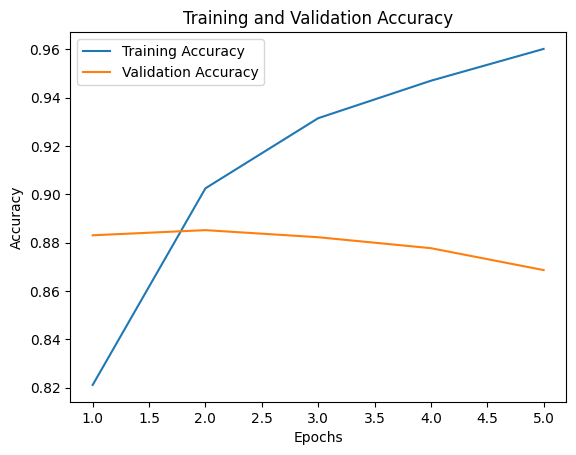

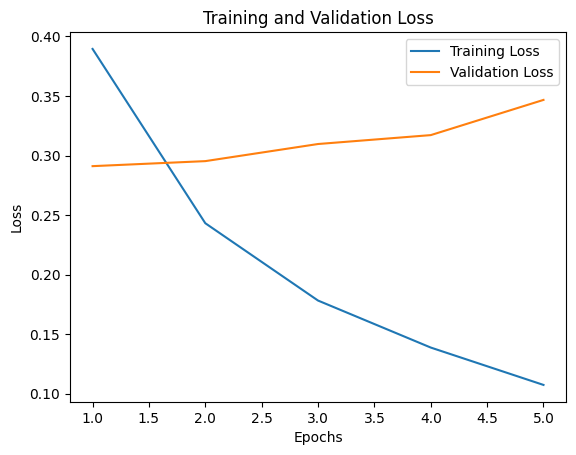

In [15]:
# Get training history data
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# Plot Accuracy
plt.figure()
plt.plot(epochs, acc, label="Training Accuracy")
plt.plot(epochs, val_acc, label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Plot Loss
plt.figure()
plt.plot(epochs, loss, label="Training Loss")
plt.plot(epochs, val_loss, label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [17]:
def predict_review(review):
    seq = tokenizer.texts_to_sequences([review])
    padded = pad_sequences(seq, maxlen=200)
    prediction = model.predict(padded)[0][0]
    sentiment = "Positive" if prediction > 0.5 else "Negative"
    print(f" Review: {review}")
    print(f" Predicted Sentiment: {sentiment} ({prediction:.2f})")

# Try a few examples
predict_review("I absolutely loved this movie, it was fantastic!")
predict_review("This was a waste of time. The plot was boring and predictable.")
predict_review("It had some good moments, but overall it was okay.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
 Review: I absolutely loved this movie, it was fantastic!
 Predicted Sentiment: Positive (0.90)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
 Review: This was a waste of time. The plot was boring and predictable.
 Predicted Sentiment: Negative (0.00)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
 Review: It had some good moments, but overall it was okay.
 Predicted Sentiment: Negative (0.09)
